This dataset has funding information of the Indian startups from January 2015 to August 2017



There is some error in the 'Date' feature. Make sure to handle that.



In [2]:
import pandas as pd
import numpy as np

df= pd.read_csv("startup_funding.csv")
#df.head()

date=df["Date"]
for i in date:
  if len(i.split("/"))!=3:
    print(i)

12/05.2015
12/05.2015
13/04.2015
15/01.2015
22/01//2015


Replace the error date format

In [3]:
#df["Date"].replace("05/072018","05/07/2018",inplace=True)
df["Date"].replace("12/05.2015","12/05/2015",inplace=True)
df["Date"].replace("13/04.2015","13/04/2015",inplace=True)
#df["Date"].replace("13/01//2015","13/01/2015",inplace=True)
df["Date"].replace("15/01.2015","15/01/2015",inplace=True)
df["Date"].replace("22/01//2015","22/01/2015",inplace=True)
date=df["Date"]
for i in date:
  if len(i.split("/"))!=3:
    print(i)

Check the trend of investments over the years. To check the trend, find -
Total number of fundings done in each year.
Plot a line graph between year and number of fundings. Take year on x-axis and number of fundings on y-axis.
Print year-wise total number of fundings also. Print years in ascending order.Output Format :
year1 TotalFunding1
year2 TotalFunding2

In [4]:
def convert_to_year(date):
  return date.split("/")[-1]

df["year"]=df["Date"].apply(convert_to_year)
#print(df["year"])
year_count= df["year"].value_counts()
#print(year_count)
#print(year_count.index)
#print(year_count.values)

year_fund= list(zip(year_count.index, year_count.values))
#print(year_fund)
year_fund= np.array(year_fund,dtype=int)
year_fund= np.array(year_fund[0:],dtype=int)
#print(year_fund)

year_fund= year_fund[year_fund[:,0].argsort()]
year= year_fund[:,0]
funding_round= year_fund[:,1]
print(year)

[2015 2016 2017]


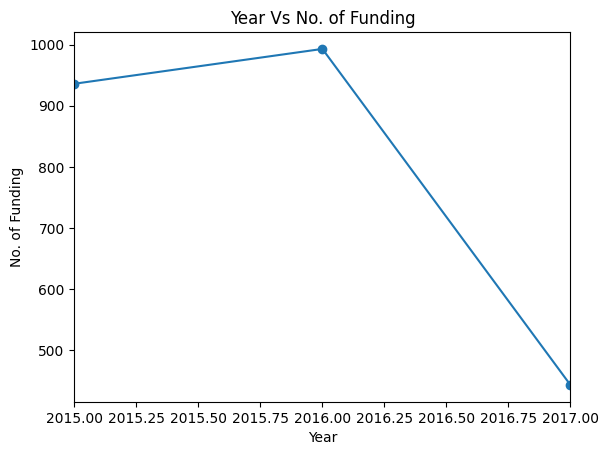

Year: 2015    No. of Funding: 936
Year: 2016    No. of Funding: 993
Year: 2017    No. of Funding: 443


In [5]:
import matplotlib.pyplot as plt
plt.xlim(2015,2017)
plt.plot(year,funding_round,marker="o")
#plt.xticks(year)
plt.xlabel("Year")
plt.ylabel("No. of Funding")
plt.title("Year Vs No. of Funding")
plt.show()

for i in range(len(year)):
  print("Year:",year[i],"  ","No. of Funding:",funding_round[i])

Top Indian Cities

Find out which cities are generally chosen for starting a startup.
Find top 10 Indian cities which have most number of startups ?
Plot a pie chart and visualise it.
Print the city name and number of startups in that city also.

Note :
Take city name "Delhi" as "New Delhi".
Check the case-sensitiveness of cities also. That means - at some place, instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore".
For few startups multiple locations are given, one Indian and one Foreign. Count those startups in Indian startup also. Indian city name is first.
Print the city in descending order with respect to the number of startups.
Output Format :
city1 number1
city2 number2
. . .

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df= pd.read_csv("startup_funding.csv")

df["CityLocation"].dropna(inplace=True)

#city=df["CityLocation"]
#def seperatecity(cityL):
#  return cityL.split("/")[0]
#df["CityLocation"]=df["CityLocation"].apply(seperatecity)

df["CityLocation"].replace("Delhi","New Delhi",inplace=True)
df["CityLocation"].replace("banglore","Banglore",inplace=True)
city_number= df["CityLocation"].value_counts()[0:10]
city= city_number.index
numcity= city_number.values
for i in range(len(city)):
  print(city[i],numcity[i])

Bangalore 627
Mumbai 446
New Delhi 385
Gurgaon 240
Pune 84
Noida 78
Hyderabad 76
Chennai 66
Ahmedabad 35
Jaipur 25


Problem Statement :
Find out if cities play any role in receiving funding.
Find top 10 Indian cities with most amount of fundings received. Find out percentage of funding each city has got (among top 10 Indian cities only).
Print the city and percentage with 2 decimal place after rounding off.
Output Format :
city1 percent1
city2 percent2
city3 percent3
. . .
. . .
. . .

In [18]:
def separateCity(city):
  city= str(city)
  return city.split('/')[0].strip()

In [24]:
import pandas as pd
import numpy as np
df1 = pd.read_csv('startup_funding.csv', encoding='utf-8')
df=pd.DataFrame()

df['CityLocation']=df1["CityLocation"]
#df["CityLocation"].replace(["nan"], '', inplace=True)
df['CityLocation'].dropna(inplace=True)
df['CityLocation']=df['CityLocation'].apply(separateCity)
df["CityLocation"].replace(['Delhi'], 'New Delhi', inplace=True)
df["CityLocation"].replace(['bangalore'], 'Bangalore', inplace=True)
df['AmountInUSD']=df1['AmountInUSD'].apply(lambda x:float(str(x).replace(",","")))
df['AmountInUSD'] = pd.to_numeric(df['AmountInUSD'])
city_funding = df.groupby('CityLocation')['AmountInUSD'].sum().sort_values(ascending=False)[0:10]

city=city_funding.index
amountcity=city_funding.values
peramount=np.true_divide(amountcity,amountcity.sum())*100
for i in range(len(city)):
    print(city[i],format(peramount[i],'.2f'))

Bangalore 46.33
New Delhi 15.50
Mumbai 12.95
Gurgaon 11.38
nan 7.00
Chennai 2.26
Pune 2.02
Hyderabad 1.07
Noida 0.94
Ahmedabad 0.54


Given File 'startup_funding.csv'
Problem Statement :
There are 4 different type of investments. Find out percentage of amount funded for each investment type.
Plot a pie chart to visualise.
Print the investment type and percentage of amount funded with 2 decimal places after rounding off.
Note :
Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column.
Print the investment type in descending order with respect to the percentage of the amount funded.
Output Format :
investmentType1 percent1
investmentType2 percent2
investmentType3 percent3
. . .


In [52]:
import pandas as pd
import numpy as np
df1 = pd.read_csv('startup_funding.csv', encoding='utf-8')
df=pd.DataFrame()


df["InvestmentType"]= df1["InvestmentType"]
#print(df["InvestmentType"].index)
df["InvestmentType"].replace("PrivateEquity","Private Equity",inplace=True)
df["InvestmentType"].replace("SeedFunding","Seed Funding",inplace=True)
df["InvestmentType"].replace("Crowd funding","Crowd Funding",inplace=True)

df['AmountInUSD']=df1['AmountInUSD'].apply(lambda x:float(str(x).replace(",","")))
df['AmountInUSD'] = pd.to_numeric(df['AmountInUSD'])

investment = df.groupby('InvestmentType')['AmountInUSD'].sum().sort_values(ascending=False)

invest_type= investment.index
invest_amount= investment.values
#print(invest_amount)
peramount=np.true_divide(invest_amount,invest_amount.sum())*100
for i in range(len(invest_type)):
    print(invest_type[i],format(peramount[i],'.2f'))



Private Equity 98.15
Seed Funding 1.81
Debt Funding 0.04
Crowd Funding 0.00


Top Industries
Send Feedback
Given File 'startup_funding.csv'
Problem Statement :
Which type of companies got more easily funding. To answer this question, find -
Top 5 industries and percentage of the total amount funded to that industry. (among top 5 only)
Print the industry name and percentage of the amount funded with 2 decimal place after rounding off.
Note :
Ecommerce is the right word in IndustryVertical, so correct it.
Print the industry in descending order with respect to the percentage of the amount funded.
Output Format :
industry1 percent1
industry2 percent2
industry3 percent3
. . .

In [61]:
import pandas as pd
import numpy as np
df1 = pd.read_csv('startup_funding.csv', encoding='utf-8')
df=pd.DataFrame()

df["IndustryVertical"]= df1["IndustryVertical"]
#industry= df["IndustryVertical"].index
#print(industry)
df["IndustryVertical"].replace("eCommerce","ECommerce",inplace=True)

df['AmountInUSD']=df1['AmountInUSD'].apply(lambda x:float(str(x).replace(",","")))
df['AmountInUSD'] = pd.to_numeric(df['AmountInUSD'])

industry_name = df.groupby('IndustryVertical')['AmountInUSD'].sum().sort_values(ascending=False)[0:5]

industry= industry_name.index
industry_amount= industry_name.values

preamount= np.true_divide(industry_amount, industry_amount.sum())*100
for i in range(len(industry)):
  print(industry[i],format(preamount[i],".2f"))

ECommerce 40.51
Consumer Internet 35.96
Technology 10.45
Online Marketplace 6.63
E-Commerce & M-Commerce platform 6.44


Top startups
Send Feedback
Given File 'startup_funding.csv'
Problem Statement :
Find top 5 startups with most amount of total funding.
Print the startup name in descending order with respect to amount of funding.
Note:
Ola, Flipkart, Oyo, Paytm are important startups, so correct their names. There are many errors in startup names, ignore correcting all, just handle important ones.
Output Format :
startup1
startup2
startup3
. . .

In [73]:
import pandas as pd
import numpy as np
df1 = pd.read_csv('startup_funding.csv', encoding='utf-8')
df=pd.DataFrame()

df["StartupName"]= df1["StartupName"]
#industry= df["IndustryVertical"].index
#print(industry)
df["StartupName"].replace(["Ola Cabs","Olacabs"],"Ola",inplace=True)
df["StartupName"].replace(["Flipkart.com"],"Flipkart",inplace=True)
df["StartupName"].replace(["Oyo Rooms","Oyorooms","OyoRooms","OYO Rooms"],"Oyo",inplace=True)
df["StartupName"].replace(["Paytm Marketplace"],"Paytm",inplace=True)

df['AmountInUSD']=df1['AmountInUSD'].apply(lambda x:float(str(x).replace(",","")))
df['AmountInUSD'] = pd.to_numeric(df['AmountInUSD'])

startup_name = df.groupby('StartupName')['AmountInUSD'].sum().sort_values(ascending=False)[0:5]

startup= startup_name.index
amount= startup_name.values

preamount= np.true_divide(amount, amount.sum())*100
for i in range(len(startup)):
  print(startup[i])



Paytm 2340000000.00
Flipkart 2259700000.00
Ola 1899500000.00
Snapdeal 700000000.00
Oyo 637000000.00


Funding rounds
Send Feedback
Given File 'startup_funding.csv'
Problem Statement :
Find the top 5 startups who received the most number of funding rounds. That means, startups which got fundings maximum number of times.
Print the startup name in descending order with respect to the number of funding round as integer value.
Note:
Ola, Flipkart, Oyo, Paytm are important startups, so correct their names. There are many errors in startup names, ignore correcting all, just handle important ones.
Output Format :
startup1 number1
startup2 number2
startup3 number3
. . .


In [77]:
import pandas as pd
import numpy as np
df1 = pd.read_csv('startup_funding.csv', encoding='utf-8')
df=pd.DataFrame()

df["StartupName"]= df1["StartupName"]
#industry= df["IndustryVertical"].index
#print(industry)
df["StartupName"].replace(["Ola Cabs","Olacabs"],"Ola",inplace=True)
df["StartupName"].replace(["Flipkart.com"],"Flipkart",inplace=True)
df["StartupName"].replace(["Oyo Rooms","Oyorooms","OyoRooms","OYO Rooms"],"Oyo",inplace=True)
df["StartupName"].replace(["Paytm Marketplace"],"Paytm",inplace=True)

countfunding= df["StartupName"].value_counts().sort_values(ascending=False)[0:5]
startup= countfunding.index
count= countfunding.values
for i in range(len(startup)):
  print(startup[i],count[i])

Ola 9
Swiggy 7
UrbanClap 6
Paytm 6
Oyo 6


Top Investor
Send Feedback
Given File 'startup_funding.csv'
Problem Statement :
Find the Investors who have invested maximum number of times.
Print the investor name and number of times invested as integer value.
Note:
In startup, multiple investors might have invested. So consider each investor for that startup.
Ignore the undisclosed investors.
Output Format :
investorname number

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



df=pd.read_csv("startup_funding.csv")
start=pd.DataFrame()
start["name"]=df["InvestorsName"]
start.dropna(inplace=True)
names=[]

for i in start["name"]:
  #print(i)
  l=[z.strip() for z in i.split(",")]
  names.extend(l)

label=["name"]
ans= pd.DataFrame(names, columns= label)
top=ans["name"].value_counts(ascending=False)
print(top.index[0], int(top.values[0]))

Sequoia Capital 64
